# Volve Oil and Gas Production Data Prediction

This project will encompass data cleaning and machine learning prediction of data from Volve field which was publicized by Equinor (https://www.equinor.com/en/how-and-why/digitalisation-in-our-dna/volve-field-data-village-download.html).

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

df = pd.read_excel(r"D:\Petroleum Data\Volve Data\Production_data\Volve production data - Kopya.xlsx", 
                   sheet_name= "Daily Production Data")

df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
DATEPRD                     15634 non-null datetime64[ns]
WELL_BORE_CODE              15634 non-null object
NPD_WELL_BORE_CODE          15634 non-null int64
NPD_WELL_BORE_NAME          15634 non-null object
NPD_FIELD_CODE              15634 non-null int64
NPD_FIELD_NAME              15634 non-null object
NPD_FACILITY_CODE           15634 non-null int64
NPD_FACILITY_NAME           15634 non-null object
ON_STREAM_HRS               15349 non-null float64
AVG_DOWNHOLE_PRESSURE       8980 non-null float64
AVG_DOWNHOLE_TEMPERATURE    8980 non-null float64
AVG_DP_TUBING               8980 non-null float64
AVG_ANNULUS_PRESS           7890 non-null float64
AVG_CHOKE_SIZE_P            8919 non-null float64
AVG_CHOKE_UOM               9161 non-null object
AVG_WHP_P                   9155 non-null float64
AVG_WHT_P                   9146 non-null float64
DP_CHOKE_SIZE               15340 no

There are null datas or empty data cells, they must be handled.

Amount of null datas in each column are:

In [154]:
df.isnull().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

Null data cells for production wells are:

In [155]:
df[df["FLOW_KIND"] == "production"].isnull().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE        181
AVG_DOWNHOLE_TEMPERATURE     181
AVG_DP_TUBING                181
AVG_ANNULUS_PRESS           1271
AVG_CHOKE_SIZE_P             242
AVG_CHOKE_UOM                  0
AVG_WHP_P                      6
AVG_WHT_P                     15
DP_CHOKE_SIZE                  6
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 9146
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [156]:
well_list = df["WELL_BORE_CODE"].unique().tolist()
well_list

['NO 15/9-F-1 C',
 'NO 15/9-F-11 H',
 'NO 15/9-F-12 H',
 'NO 15/9-F-14 H',
 'NO 15/9-F-15 D',
 'NO 15/9-F-4 AH',
 'NO 15/9-F-5 AH']

Null datas much be handled for each well.

To see null datas of each well:

In [157]:
for i in well_list:
    well_df = pd.DataFrame(df.loc[df["WELL_BORE_CODE"] == i])
    well_df = well_df[well_df["FLOW_KIND"] == "production"]
    print("null sum of well", i)
    print(well_df.isnull().sum())

null sum of well NO 15/9-F-1 C
DATEPRD                       0
WELL_BORE_CODE                0
NPD_WELL_BORE_CODE            0
NPD_WELL_BORE_NAME            0
NPD_FIELD_CODE                0
NPD_FIELD_NAME                0
NPD_FACILITY_CODE             0
NPD_FACILITY_NAME             0
ON_STREAM_HRS                 0
AVG_DOWNHOLE_PRESSURE         3
AVG_DOWNHOLE_TEMPERATURE      3
AVG_DP_TUBING                 3
AVG_ANNULUS_PRESS           729
AVG_CHOKE_SIZE_P              0
AVG_CHOKE_UOM                 0
AVG_WHP_P                     0
AVG_WHT_P                     0
DP_CHOKE_SIZE                 0
BORE_OIL_VOL                  0
BORE_GAS_VOL                  0
BORE_WAT_VOL                  0
BORE_WI_VOL                 746
FLOW_KIND                     0
WELL_TYPE                     0
dtype: int64
null sum of well NO 15/9-F-11 H
DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE          

In [158]:
well_list_number = len(well_list)
well_list_number

7

Droping additional labeling columns:

In [159]:
df = df.drop(["NPD_WELL_BORE_CODE","NPD_WELL_BORE_NAME","NPD_FIELD_CODE", "NPD_FIELD_NAME", "NPD_FACILITY_CODE",'AVG_CHOKE_UOM',"NPD_FACILITY_NAME"], axis=1)

In [160]:
column_list = df.columns.tolist()
column_list

['DATEPRD',
 'WELL_BORE_CODE',
 'ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_OIL_VOL',
 'BORE_GAS_VOL',
 'BORE_WAT_VOL',
 'BORE_WI_VOL',
 'FLOW_KIND',
 'WELL_TYPE']

Deleting labels:

In [161]:
column_list.remove('DATEPRD')
column_list.remove('WELL_BORE_CODE')
column_list.remove('FLOW_KIND')
column_list.remove('WELL_TYPE')
column_list

['ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_OIL_VOL',
 'BORE_GAS_VOL',
 'BORE_WAT_VOL',
 'BORE_WI_VOL']

In [162]:
column_list_number = len(column_list)
column_list_number

13

Features that will be used in prediction or in other words factor affecting production rates are:

In [163]:
features = ['ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_WAT_VOL']

## Important: Well Selecting Code

In [164]:
#for i in well_list:
    #well_df = pd.DataFrame(df.loc[df["WELL_BORE_CODE"] == i])
    #well_df = well_df[well_df["FLOW_KIND"] == "production"]

# Data Cleaning

- Missing Datas

- Outliers

## Only For One Well

## Missing Data Handling

Options are:

- Replacing them with -999 to identify them

- Do nothing / Filter rows / Ignore the column / Predict them

- Work with only wells with good data

- Machine Learning models to replace them (Linear Regression, Nearest Neighbors, Neural Networks)

Handling missing values for each well by forward filling (ffill) which is about filling the empty cell by previous cell:

In [165]:
for well in well_list:
    well_df = pd.DataFrame(df.loc[df["WELL_BORE_CODE"] == well])
    #well_df = well_df[well_df["FLOW_KIND"] == "production"]
    well_df.fillna(method="ffill", inplace=True)
    df.update(well_df)   
    
df.fillna(0,inplace=True)

In [166]:
df.isnull().sum()

DATEPRD                     0
WELL_BORE_CODE              0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
BORE_WI_VOL                 0
FLOW_KIND                   0
WELL_TYPE                   0
dtype: int64

## Finding Outliers

Univariate analysis:

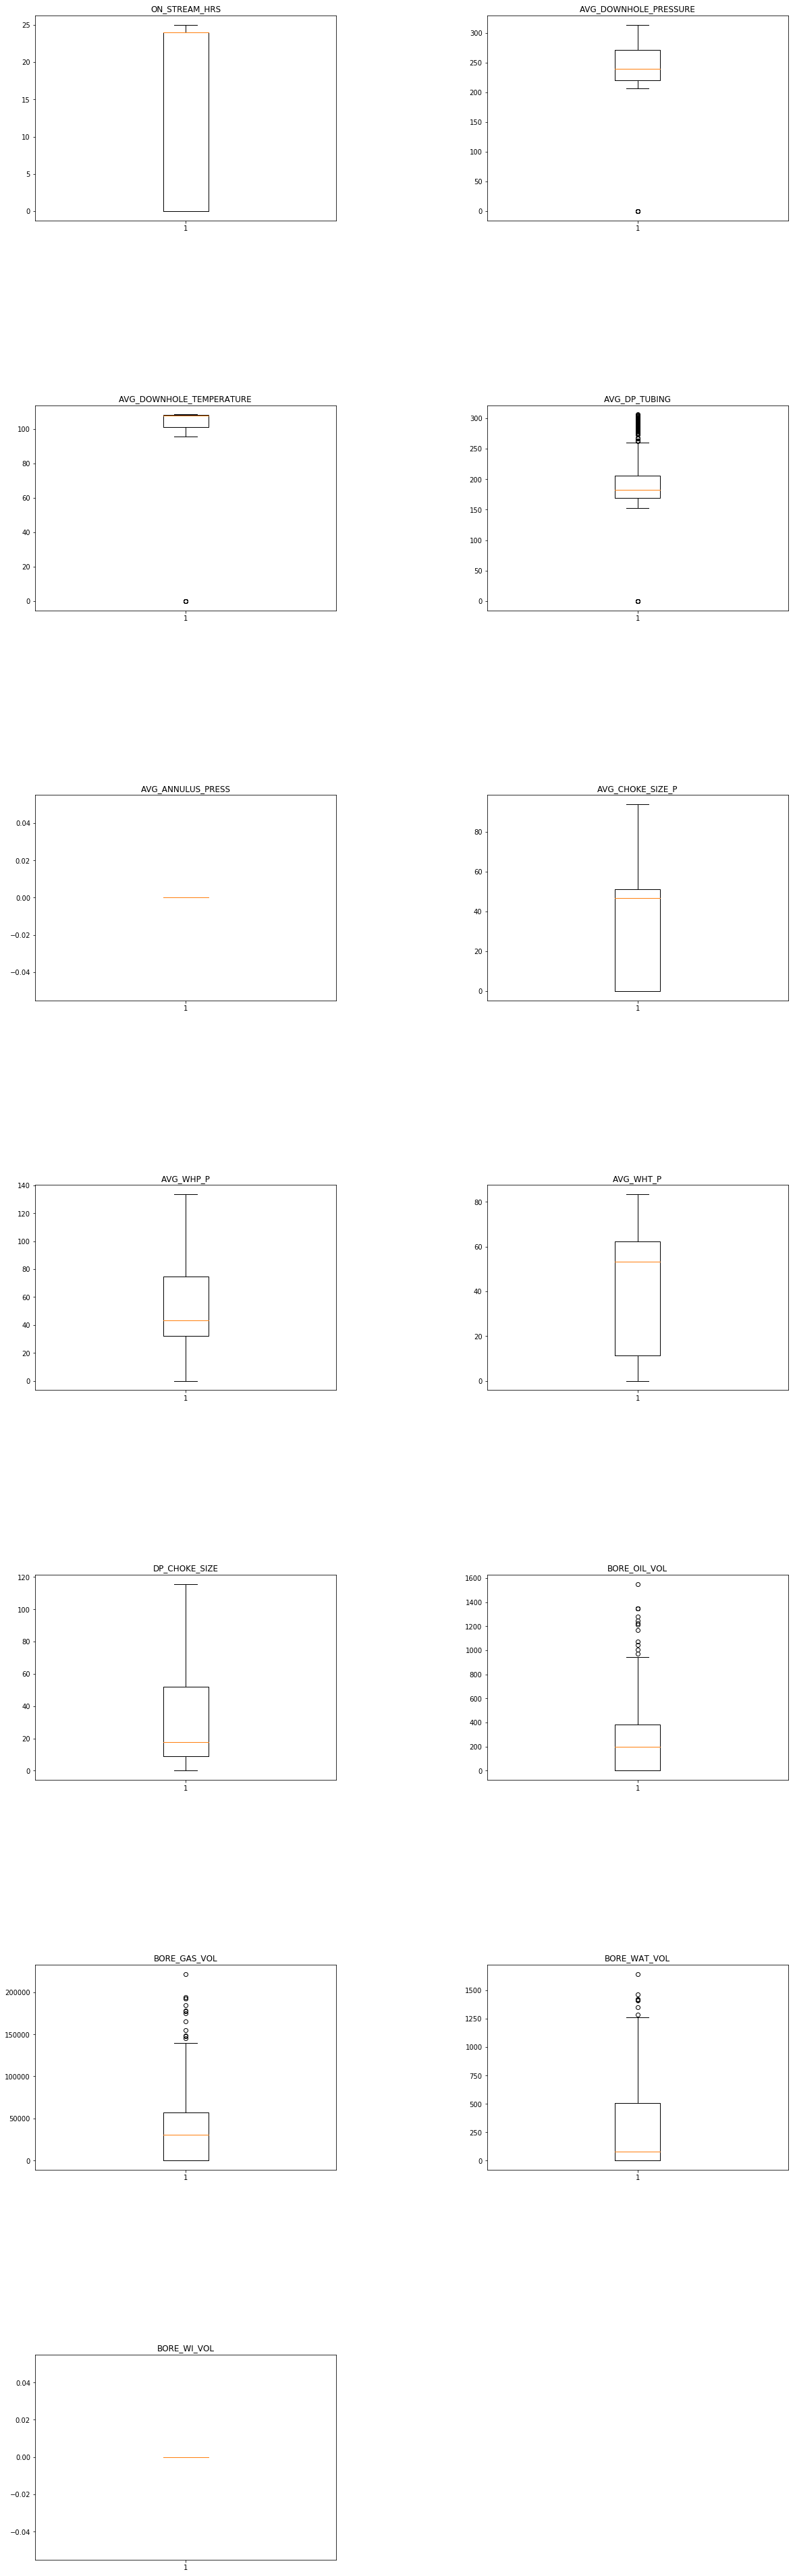

In [167]:
fig = plt.figure(figsize=(20, 80))

for j in range(0,column_list_number):

    ax = fig.add_subplot(column_list_number-5,2,j+1)
    well_df = pd.DataFrame(df.loc[df["WELL_BORE_CODE"] == well_list[0]])
    #well_df = well_df[well_df["FLOW_KIND"] == "production"]
    ax.boxplot(x=well_df[column_list[j]]) # doing notnull() doesnt working
    ax.set_title(column_list[j])

plt.subplots_adjust(wspace=0.5, hspace=0.9)

plt.show()

# For Removing Outliers If Necessary

## Possible Decisions About Outliers Are:
    
- Doing nothing

- Filtering (can introduce sampling bias, but sometimes useful)

- Ignoring the column

- Replacing (making them 0, average of all kinds, median, mean, min, max etc. or predicting them with Machine Learning)

- Grouping or binning (making intervals of low, medium and high)

For removal of outliers:

In [168]:
frame = {}
for c in features:
    a = df[c].between(df[c].quantile(.02), df[c].quantile(.98)) # this ratio is found by trial and error 0.015 vs 0.0985
    frame[c] =  a                                       #is also ok


In [169]:
for c in features:
    df[c] = df[c][frame[c]]  

In [170]:
df.dropna(inplace=True)
df.shape

(13694, 17)

In [171]:
df_filtered = df

In [172]:
#fig = plt.figure(figsize=(20, 80))
#
#for j in range(0,column_list_number):
#
#    ax = fig.add_subplot(column_list_number-5,2,j+1)
#    well_df = pd.DataFrame(df.loc[df["WELL_BORE_CODE"] == well_list[0]])
#    #well_df = well_df[well_df["FLOW_KIND"] == "production"]
#    ax.boxplot(x=well_df[column_list[j]]) # doing notnull() doesnt working
#    ax.set_title(column_list[j])
#
#plt.subplots_adjust(wspace=0.5, hspace=0.9)
#
#plt.show()

In [173]:
#fig = plt.figure(figsize=(20, 80))
#
#for j in range(0,column_list_number):
#
#    ax = fig.add_subplot(column_list_number-5,2,j+1)
#    well_df = pd.DataFrame(df_filtered.loc[df["WELL_BORE_CODE"] == well_list[0]])
#    #well_df = well_df[well_df["FLOW_KIND"] == "production"]
#    ax.hist(x=well_df[column_list[j]]) # doing notnull() doesnt working
#    ax.set_title(column_list[j])
#
#plt.subplots_adjust(wspace=0.5, hspace=0.9)
#
#plt.show()

# General Plotting Algorithm

This cell of code is made for WELL SELECTING and then doing visualizations.

In [174]:
#for i in well_list:
#    well_df = pd.DataFrame(df.loc[df["WELL_BORE_CODE"] == i])
#    
#    #for cumulative production, wells must be production wells
#    well_df = well_df[well_df["FLOW_KIND"] == "production"]
#    plt.figure(figsize= (7,7))
#    plt.title(i)
#    plt.ylabel("Produced Oil Volume")
#    plt.xlabel("Time")
#    #plt.ylim(0,6000) # max producing well is producing 6000 so this value will make comparison of each well better
#    plt.plot(well_df["DATEPRD"], well_df["BORE_OIL_VOL"])
#    plt.plot(well_df["DATEPRD"], well_df["BORE_GAS_VOL"])
#    plt.show()

## Plots for Production and Injection:

Cumulative Sum For Production:

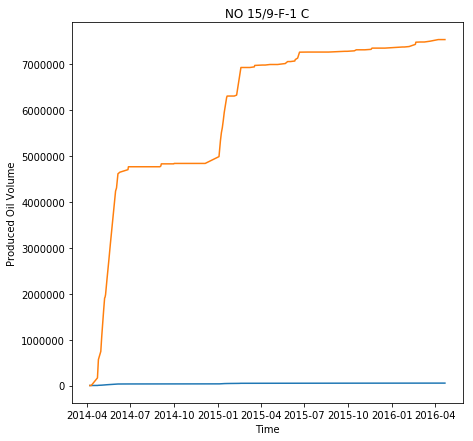

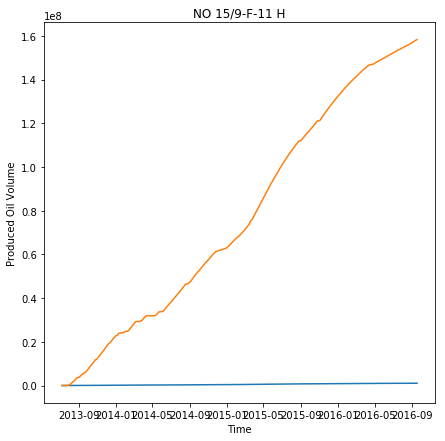

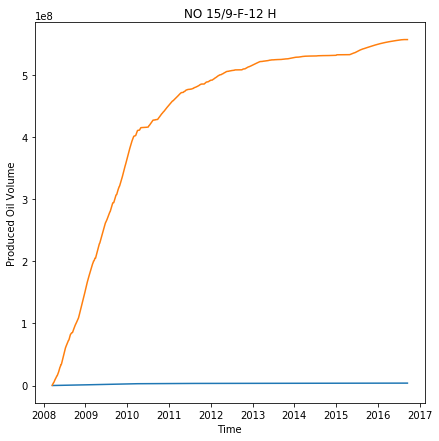

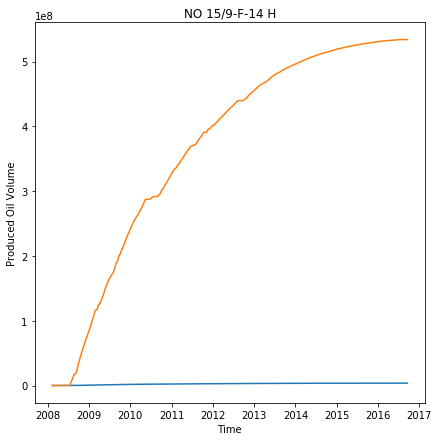

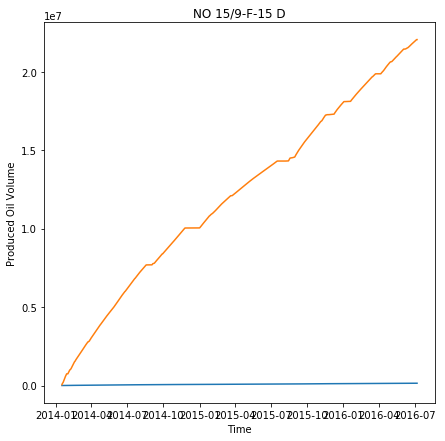

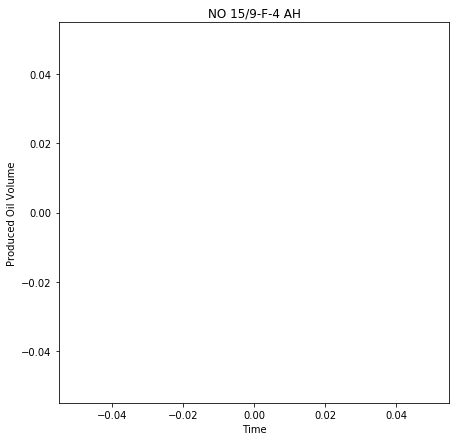

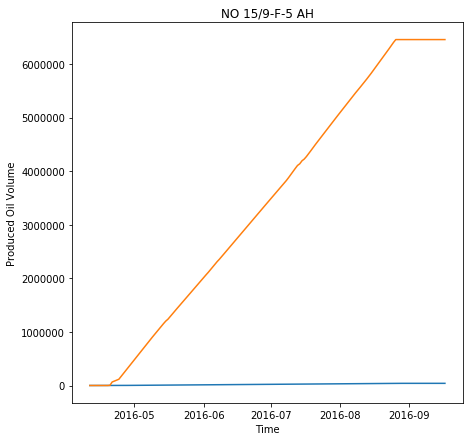

In [175]:
for i in well_list:
    well_df = pd.DataFrame(df_filtered.loc[df_filtered["WELL_BORE_CODE"] == i])
    
    #for bore oil vol, wells must be production wells"
    well_df = well_df[well_df["FLOW_KIND"] == "production"]
    plt.figure(figsize= (7,7))
    plt.title(i)
    plt.ylabel("Produced Oil Volume")
    plt.xlabel("Time")
    #plt.ylim(0,6000) # max producing well is producing 6000 so this value will make comparison of each well better
    plt.plot(well_df["DATEPRD"], well_df["BORE_OIL_VOL"].cumsum())
    plt.plot(well_df["DATEPRD"], well_df["BORE_GAS_VOL"].cumsum())
    plt.show()

Cumulative Sum For Injection:

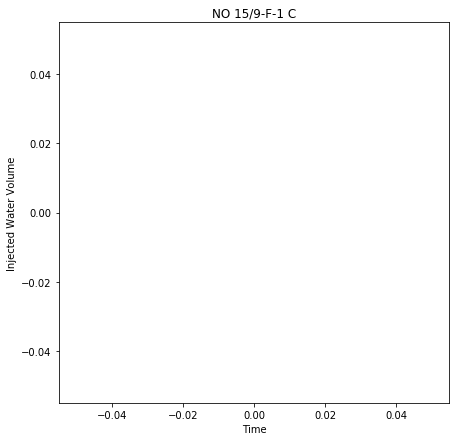

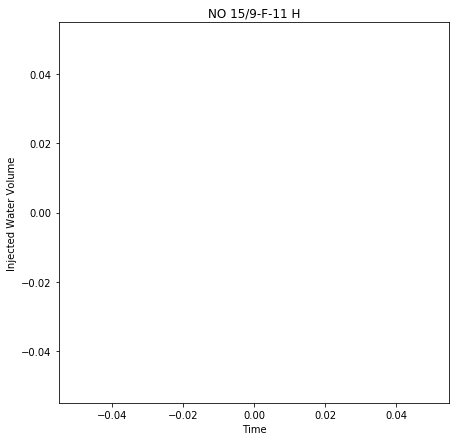

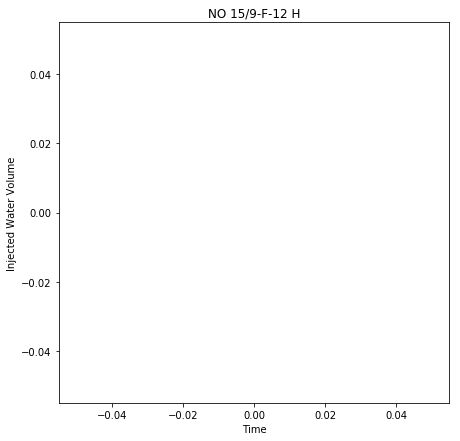

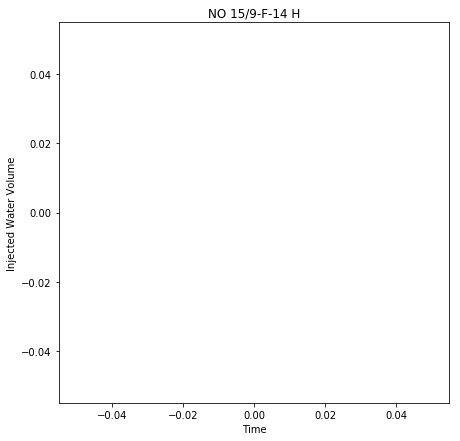

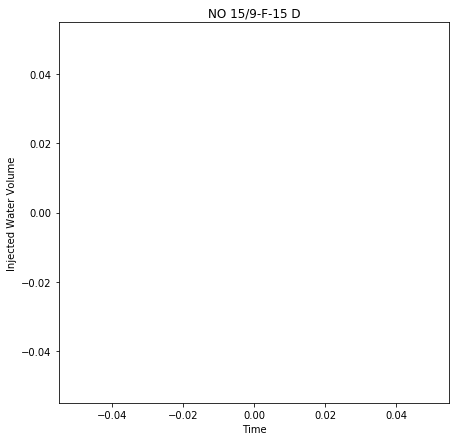

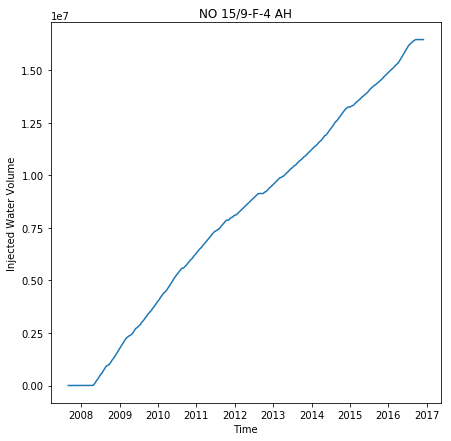

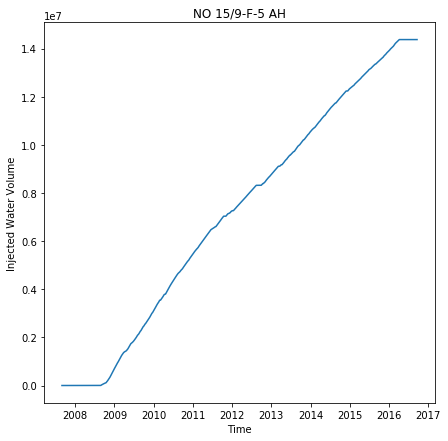

In [176]:
for i in well_list:
    well_df = pd.DataFrame(df_filtered.loc[df_filtered["WELL_BORE_CODE"] == i])
    
    #for bore oil vol, wells must be production wells"
    well_df = well_df[well_df["FLOW_KIND"] == "injection"]
    plt.figure(figsize= (7,7))
    plt.title(i)
    plt.ylabel("Injected Water Volume")
    plt.xlabel("Time")
    #plt.ylim(0,6000) # max producing well is producing 6000 so this value will make comparison of each well better
    plt.plot(well_df["DATEPRD"], well_df["BORE_WI_VOL"].cumsum())
    plt.show()

Assumptions of Regression Model :

- Linearity or polynomiality: The relationship between dependent and independent variables should be linear or polynomial.

- Homoscedasticity: Constant variance of the errors should be maintained.

- Gaussian errors: our errors are Gaussian distributed with mean 0. This is necessary for a range of statistical tests, such as the t-test

- Lack of Multicollinearity: It is assumed that there is little or no multicollinearity in the data.

- Independent errors: our errors are independent. Violations can cause a wide range of problems for inference

# Machine Learning for Production Forecasting

## The workflow:

- Outlier removal / Neglecting extreme fluctations / Excluding 0 production in time series can be done if model must be improved

- Correlation Matrix

- Self-Organizing Maps for discrete values (Results can be used as additional input to NN)

- Remove non-linearity and correct non-normality

- PCA and cross validation for:

    - Multiple Linear Regressions (Weighted linear regression / Alternating conditional expectation can be done to improve results)

    - NN

- Compare different models (MLR vs NN)

After all this:

- Bootstrapping

For a single production well target and predictors are:

In [177]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition

well_df = pd.DataFrame(df_filtered.loc[df["WELL_BORE_CODE"] == well_list[1]])

target = "BORE_GAS_VOL"
features = ['ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_WAT_VOL']

X_train, X_test, y_train, y_test = train_test_split(well_df[features]
            ,well_df[target], test_size=0.2, random_state=0)


## Linearity

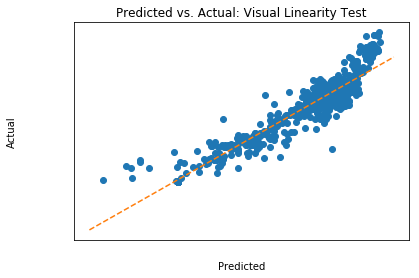

In [178]:
from scipy import stats
from statsmodels.regression.linear_model import OLS 
import statsmodels as sm

y = y_train
X_train_np = np.array(X_train)
y_np = np.array(y)

def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
 #fit an OLS model to data

model = OLS(y_np,sm.tools.add_constant(X_train_np))
results = model.fit()
#predict y values for training data
y_hat = model.predict(results.params)
#plot predicted vs actual
plt.plot(y_hat,y_np,'o')
plt.xlabel('Predicted')#,color='white')
plt.ylabel('Actual')#,color='white')
plt.title('Predicted vs. Actual: Visual Linearity Test')#,color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
abline(1,0)
plt.show()

Distribution is not perfectly linear, other models than Linear Regression is recommended.

## Homoscedasticity

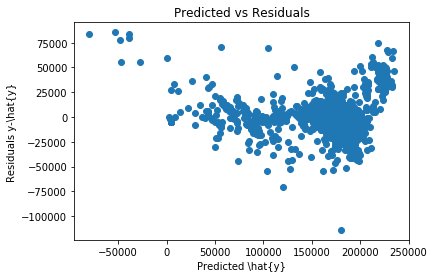

In [179]:
plt.plot(y_hat,y_np-y_hat,'o')
plt.xlabel(r'Predicted \hat{y}')
plt.ylabel(r'Residuals y-\hat{y}')
plt.title('Predicted vs Residuals')
plt.tick_params(axis='x')
plt.tick_params(axis='y')

Text(0, 0.5, 'Squared Residual')

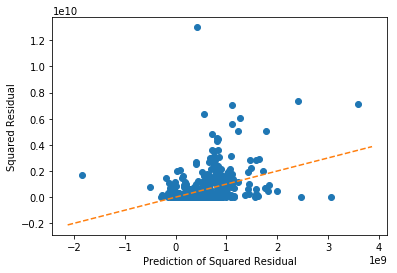

In [180]:
resid_model = OLS((y_np-y_hat)**2,X_train_np) 
results_resid = resid_model.fit() 
resid_predict = resid_model.predict(results_resid.params) 
plt.plot(resid_predict,(y_np-y_hat)**2,'o')

abline(1, 0)
plt.xlabel('Prediction of Squared Residual')
plt.ylabel('Squared Residual')

## Gaussian Distribution

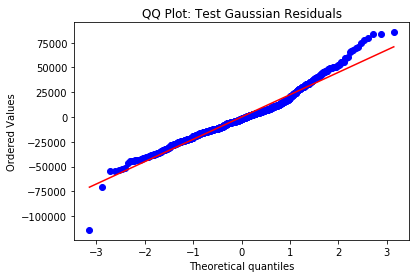

In [181]:
import pylab 
import scipy.stats as stats 
stats.probplot(y_np-y_hat, dist="norm", plot=pylab) 
pylab.title('QQ Plot: Test Gaussian Residuals') 
pylab.show()

The data is not exhibiting perfectly Gaussian behavior. Options are:
 -  transform either features or response 
 -  fit a GLM instead of doing linear regression 
 -  bootstrapping

## Collinearity

Finding variance inflation factor:

In [182]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_np, i) for i in range(X_train_np.shape[1])]
print(vif)

[67.45662232978043, 20967.386438484347, 2606.4591836241593, 12361.902155108646, 17.394106733905346, 26.44807541945933, 3337.3535769184946, 346.09019716699487, 1097.586646049134, 71.29503765287993]


## Correlation Matrices

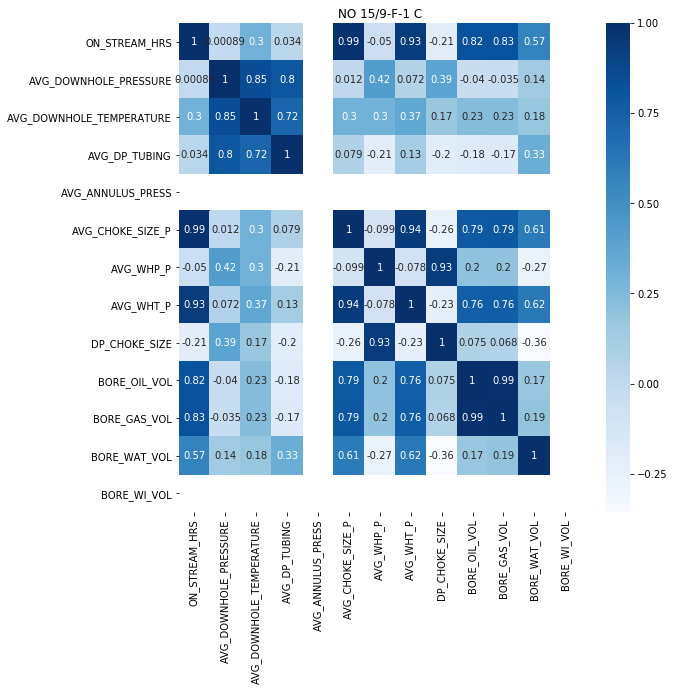

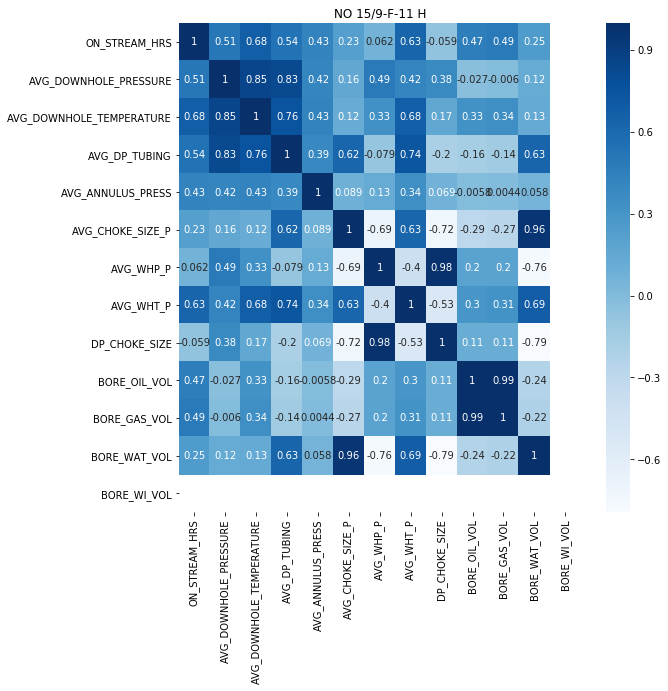

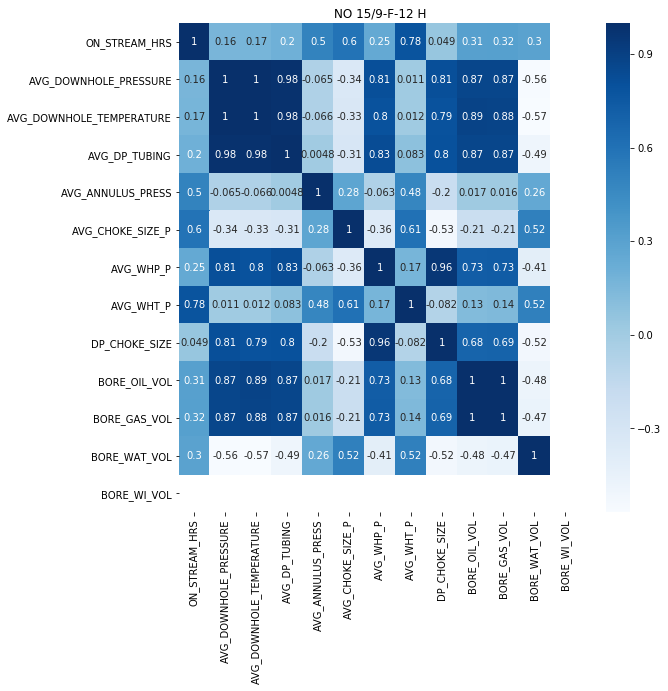

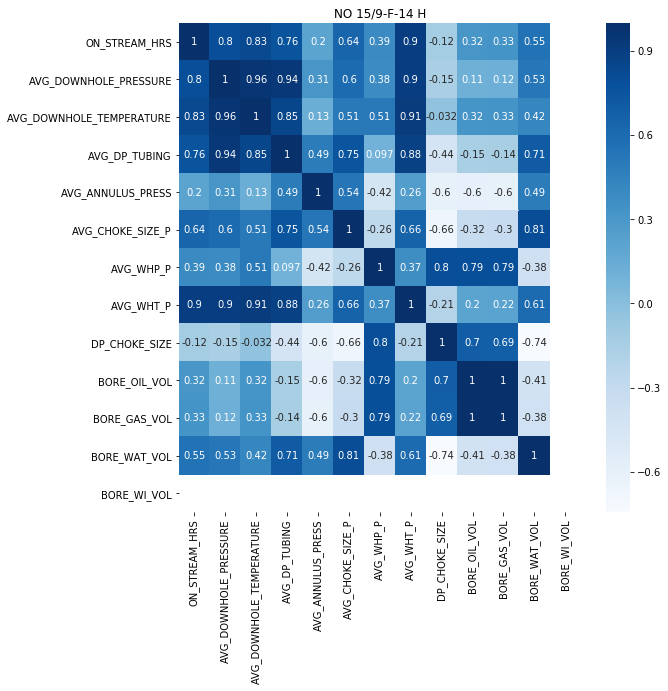

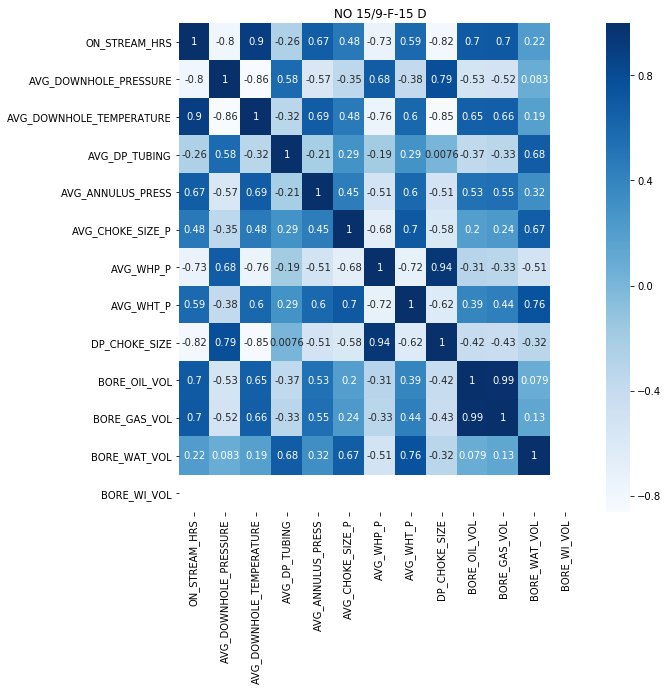

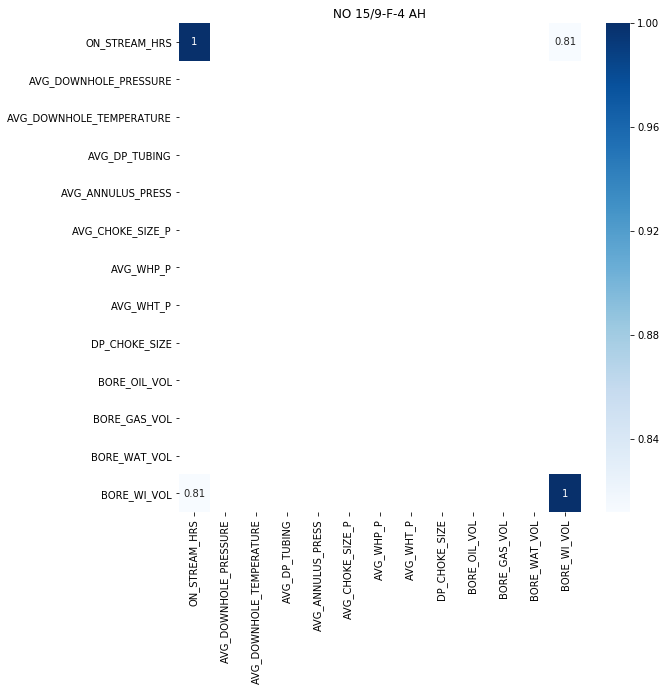

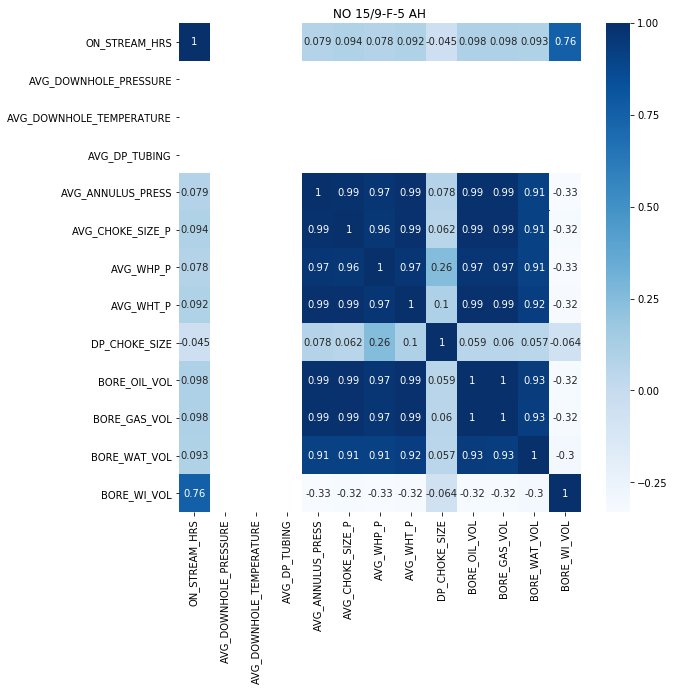

In [183]:
for i in range(0,well_list_number):
    
    fig, ax = plt.subplots(figsize=(9,9))
    well_df = pd.DataFrame(df_filtered.loc[df["WELL_BORE_CODE"] == well_list[i]])
    sns.heatmap(well_df.corr(), ax= ax, cmap="Blues", annot=True)
    ax.set_title(well_list[i])


plt.show()

Correlated features close to 1 must not be used in predictions.

## Multiple Linear Regressions

In [184]:
corr_matrix = well_df[features].corr().abs()

corr_matrix

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_WAT_VOL
ON_STREAM_HRS,1.000000,NaN,NaN,NaN,0.079426,0.094192,0.077825,0.091631,0.044551,0.092542
AVG_DOWNHOLE_PRESSURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVG_DOWNHOLE_TEMPERATURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVG_DP_TUBING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVG_ANNULUS_PRESS,0.079426,NaN,NaN,NaN,1.000000,0.988977,0.970690,0.990809,0.078258,0.907824
AVG_CHOKE_SIZE_P,0.094192,NaN,NaN,NaN,0.988977,1.000000,0.959699,0.994270,0.062123,0.911619
AVG_WHP_P,0.077825,NaN,NaN,NaN,0.970690,0.959699,1.000000,0.972105,0.255365,0.911212
AVG_WHT_P,0.091631,NaN,NaN,NaN,0.990809,0.994270,0.972105,1.000000,0.101023,0.923963
DP_CHOKE_SIZE,0.044551,NaN,NaN,NaN,0.078258,0.062123,0.255365,0.101023,1.000000,0.057253
BORE_WAT_VOL,0.092542,NaN,NaN,NaN,0.907824,0.911619,0.911212,0.923963,0.057253,1.000000


In [185]:
corr_matrix = well_df[features].corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

well_df = well_df.drop(well_df[to_drop], axis=1)

In [186]:
well_df = pd.DataFrame(df_filtered.loc[df_filtered["WELL_BORE_CODE"] == well_list[0]])

target = "BORE_GAS_VOL"
features = ['ON_STREAM_HRS',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_WAT_VOL']

X_train, X_test, y_train, y_test = train_test_split(well_df[features]
            ,well_df[target], test_size=0.2, random_state=0)


In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

model = linear_model.Ridge()
model.fit(X_train, y_train)

coeff_df = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
print(coeff_df)

y_pred = model.predict(X_test)

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_df.head(10))

                          Coefficient
ON_STREAM_HRS             3198.599893
AVG_DOWNHOLE_PRESSURE       28.023881
AVG_DOWNHOLE_TEMPERATURE  -169.314141
AVG_DP_TUBING              -84.764087
AVG_ANNULUS_PRESS            0.000000
AVG_CHOKE_SIZE_P           -57.912490
AVG_WHP_P                  112.787968
AVG_WHT_P                  756.204271
DP_CHOKE_SIZE              223.516361
BORE_WAT_VOL               -70.477705
        Actual      Predicted
367       0.00    8227.265925
684   47840.20   51265.905660
536       0.00    6424.372340
242       0.00   78397.490745
576       0.00   11504.393667
419       0.00    7716.177634
80    55419.55   72598.550290
275   84034.22   71545.946216
240       0.00   -4960.860314
24   174608.88  114120.005663


### Comparing Rates of Actual and Predicted Values

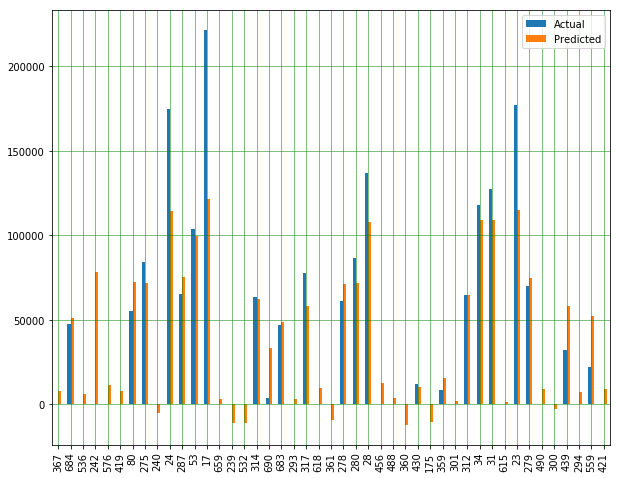

In [188]:
result_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Some prediction values are below zero which is illogical for a production well; this must be fixed.

In [189]:
result_df = result_df.join(well_df["DATEPRD"])
result_df = result_df.sort_values(by=["DATEPRD"])

Table of actual and predicted values:

In [190]:
result_df

,Actual,Predicted,DATEPRD
17,221707.31,121267.047440,2014-04-24
23,177107.86,114907.721753,2014-04-30
24,174608.88,114120.005663,2014-05-01
28,136980.49,107940.970046,2014-05-05
31,127564.51,109016.494127,2014-05-08
34,117731.72,109266.526921,2014-05-11
53,103977.99,99698.198790,2014-05-30
80,55419.55,72598.550290,2014-06-26
175,0.00,-10446.302762,2014-09-29
239,0.00,-11090.938319,2014-12-02


### Comparing Cumulative Rates of Actual and Predicted Values

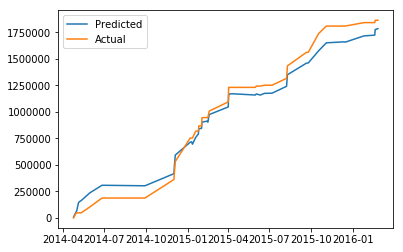

In [191]:
plt.plot(result_df["DATEPRD"], y_pred.cumsum(), label="Predicted")
plt.plot(result_df["DATEPRD"], y_test.cumsum(), label="Actual")
plt.legend()
plt.show()

Prediction metrics:

In [192]:
rmsd = np.sqrt(mean_squared_error(y_test, y_pred))      
r2_value = r2_score(y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

Intercept: 
 -685.4164230412644
Root Mean Square Error 
 25931.650492996643
R^2 Value: 
 0.7909215521817633


# Conclusion

In the project, data cleaning and value prediction were done by using Ridge Regression which is a kind of Linear Regression. Since prediction was only done on one well to create a prototype, to see the performance of this prediction model better, it must be used on other wells and other fields as well. 

In order to improve the model, different handling approaches and outlier removals can be done in a trial and error approach. Furthermore, prediction model can be improved by using Neural Network rather than Linear Regression.